In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# plt.subplot?

In [2]:
# For plt.subplot: subplot(nrows, ncols, index, **kwargs)

# In matplotlib, a conceptual grid is overlayed on the figure. And a subplot command allows
# us to create axis to different portions of this grid

# For instance, if we want to create two plots side by side, we would call subplot with the
# parameters 1, 2 and 1.
# This would allow us to use 1 row with 2 columns, and set the first axis to be the current
# axis

plt.figure()
plt.subplot(1, 2, 1)

linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])

plt.plot(linear_data, '-o')

<IPython.core.display.Javascript object>

In [3]:
# We can call subplot again with the last parameter as a 2 to plot new data to a plot
# on the right side

exponential_data = linear_data ** 2

plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [4]:
# The norm with matplotlib is that we store the axis object that we get back from the
# subplot.
# But we can call subplot again, at any time with the parameters that interest us in order
# to get back a given axis

# Let's put exponential on the linear graph too
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

<ipython-input-4-28b253141a7e>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


In [5]:
# A common problem is that graphs in the same figure have different axis, misleading the
# reader

In [6]:
# We can create subplots that share x, y, or both axis

# After plotting the data we create the axis on the right-hand side, and we indicate
# explicitly we want to share the y-axis

plt.figure()

ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')

ax2 = plt.subplot(1, 2, 2, sharey = ax1)
plt.plot(exponential_data, '-o', )

<IPython.core.display.Javascript object>

In [7]:
# Now, we don't have to store the subplot to a variable like we did with ax1, but instead
# we can use the scripting interface -> high plot is going to get the current axis object
# with gca (Get Current Axis) underneath.
# So a cal to pipeplot.plot will transparently work with the last axis objects that we're
# using

In [8]:
# We can also pass the three parameters as one to the subplot() function
plt.figure()
plt.subplot(1, 2, 1) == plt.subplot(121)

<IPython.core.display.Javascript object>

<ipython-input-8-aee906077aea>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1) == plt.subplot(121)


True

In [9]:
# IMPORTANT

# The plot location in the matrix of items is index starting at one and not at zero
# So, if we're iterating through a matrix or list, to create subplots, we have to remember
# to start at position +1

<IPython.core.display.Javascript object>


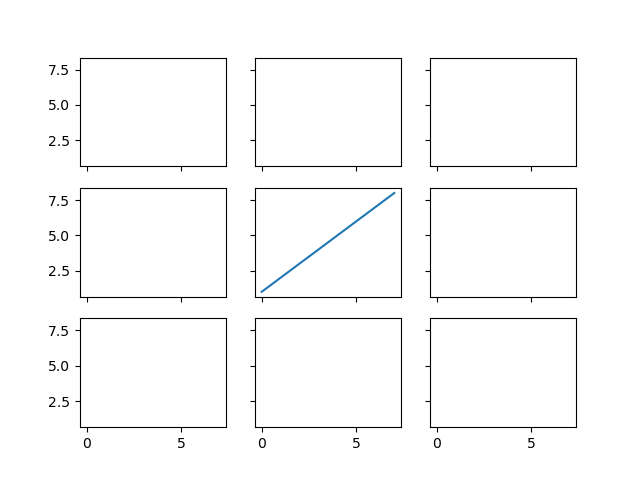

In [10]:
# subplots()

# We can also create many plots at once with the subplots() function - in plural
# This allows us to get many axis objects at once

# For instance, a 3x3 grid with all axis x and y ranges locked
dif, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3,
                                                                       sharex = True,
                                                                       sharey = True)
ax5.plot(linear_data, '-')

In [11]:
# If we want to turn the labels back on for the middle axis, we have to iterate through
# the axis objects and do it ourselves

for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [12]:
# On the notebook backend this doesn't redraw the figure.
# But we can force the figure to redraw by calling the canvas draw function

plt.gcf().canvas.draw()

In [13]:
# We can get the current figure at any time using pyplots gcf (Get Current Figure or Function)

# Histograms

It's a bar chart which shows the frequency of a given phenomena. A great example are probability distributions.

Probability function can be visualized as a curve, where the y-axis holds the probability a given value would occur, and the x-axis is the value itself. This is called a **probality density function**. THe y-axis are limited between 0 and 1.

The x.axis values are labeled in terms of the distribution function. In the case of the normal distribution, this is usually in terms of standard deviations.

In [14]:
# Examples of normal distribution

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10 ** (n + 1)
    sample = np.random.normal(loc = 0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>

In [15]:
# If we look closely, we can see that the bar of the 10,000 plots are actually wider than
# those of the 10 or the 100 plot. Why?

# By default, the histogram in Matplotlib uses 10 bins (10 different bars).
# Here we created a shared x-axis, and as we sample more from the distribution, we're more
# likely to get outlier values further from our mean. Thus, 10 bins for n = 10 is at best
# capturing 10 unique values, while for n = 10,000, many values have to be combined into a
# single bin.

In [16]:
# Let's do an example with bins = 100 // bins = number of bars

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10 ** (n + 1)
    sample = np.random.normal(loc = 0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample, bins = 100)
    axs[n].set_title('n = {}'.format(sample_size))

<IPython.core.display.Javascript object>

In [17]:
# This looks much smoother than the previous one

In [18]:
# The kind of graph we choose depends on our questions and data, some being more adequate
# for certain circumstances

# For instance, let's create a scatter plot where the y values come from a normal distribution
# and the x values from a random distribution

plt.figure()
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
plt.scatter(X, Y)

<IPython.core.display.Javascript object>

In [19]:
# Here we can't draw any conclusion

<IPython.core.display.Javascript object>


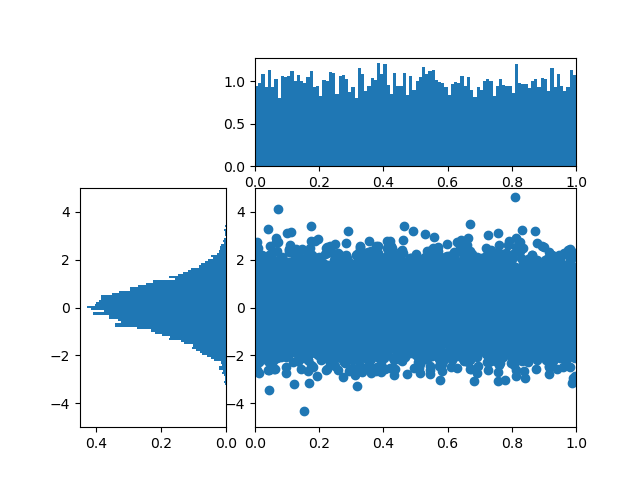

In [24]:
# GridSpec

# moreflexible layout for subplots
# To use GridSpec, we first import it, then create a new GridSpec, the overall shape that
# we want
import matplotlib.gridspec as gridspec

plt.figure()
# We define a 3 x 3 grid = 9 cells in total
gspec = gridspec.GridSpec(3, 3)

# We want the first histogram to take up the top right space, and the second histogram
# to take up the far left bottom two spaces, rotates on its side.
# The original scatter plot can take up a two by two square in the bottom right
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])  # the original scatter plot

# When we add new items with the subplot, instead of specifying the three numbers of row,
# column and position, we pass in the elements of the GridSpec object which we wist to
# cover.
# Because we are using the elements of a list, all of the indexing starts at zero, and 
# is very reasonable to use slicing for the beginning or ends of lists

In [25]:
# Now, let's fill this with some data
# First -> scatter plot
# Second -> top histogram (which is for the x values)
# Last -> side histogram (which is for the y values)

Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)

lower_right.scatter(X, Y)
top_histogram.hist(X, bins = 100)
# We want the side histogram to be lined up, so let's rotate the layout by setting the
# orientation
s = side_histogram.hist(Y, bins = 100, orientation = 'horizontal')

In [26]:
# We don't really care about the value of the y-axes for the top histogram or the value 
# of the a-axes for the bottom histogram. Since these are probability density histograms,
# we care only about the relative values.

# One handy function of an axes object is that we can clear it. This way, we don't have to
# create a new figure and do all the GridSpec work all over again
top_histogram.clear()
top_histogram.hist(X, bins = 100, density = True)
side_histogram.clear()
side_histogram.hist(Y, bins = 100, orientation = 'horizontal', density = True)
# And we flip the side histogram's x axis
side_histogram.invert_xaxis()

In [28]:
# Then we also change the axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

# Box Plots

The box plot simultanaeously shows, for each sample, the median of each value, the minimum and maximum of the samples, and the interquartile range.

In [2]:
# Let's create three different samplings from Numpy:

import pandas as pd
import numpy as np

# One for the normal distribution
normal_sample = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)

# One for the random distribution
random_sample = np.random.random(size = 10000)

# One for the gamma distribution
gamma_sample = np.random.gamma(2, size = 10000)


# Let's put them in a DataFrame
df = pd.DataFrame({'normal' : normal_sample,
                   'random' : random_sample,
                   'gamma' : gamma_sample})

# To see some summary statistics
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.001385,0.502010,2.000656
std,1.001928,0.286947,1.417916
min,-3.468530,0.000023,0.016438
25%,-0.669167,0.253641,0.961632
50%,0.002751,0.508011,1.680573
75%,0.671993,0.751298,2.696941
max,3.757593,0.999646,14.391768


In [3]:
# In a box plot, the mean or the median of the data is plotted as a straight line.
# Two boxes are formed, one above (50 - 75%) and one below (25 - 50%)
# Thin lines which are capped are then dran out to the minimum and maximum values

<IPython.core.display.Javascript object>


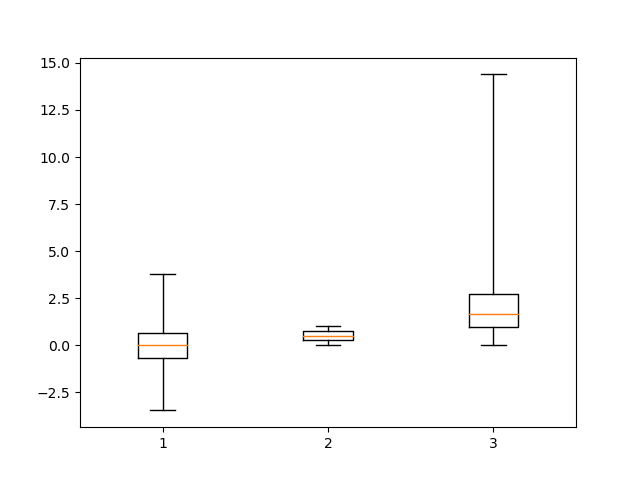

<ipython-input-12-c6e3ba83cdd6>:5: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  _ = plt.boxplot(df['normal'], whis = 'range')


In [12]:
# Matplotlib needs numpy arrays, but as pandas is built on top of that, we can simply
# project the column we want to plot

plt.figure()
_ = plt.boxplot(df['normal'], whis = 'range')

In [7]:
# It's common practice to use an underscore when unpacking values which we don't care about
# and we won't use later

In [13]:
# Let's add the other two samples
# We can't just pass a whole pandas data frame to matplotlib. Instead, we need to pull out
# each column and send them in as a list of values

plt.clf()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis = 'range')

<ipython-input-13-8e2c268ba22b>:6: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  _ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis = 'range')


<IPython.core.display.Javascript object>


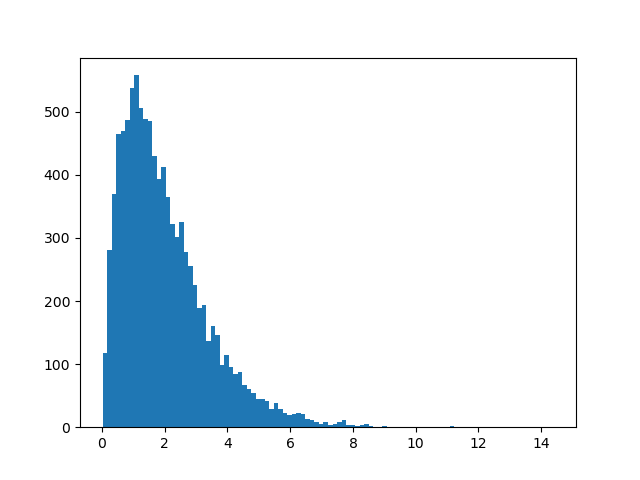

In [15]:
# If we look at the gamma distribution, we see the tail of it is very, very long. So the
# maximum values are very far out

# Let's check this with an histogram
plt.figure()
_ = plt.hist(df['gamma'], bins = 100)

<IPython.core.display.Javascript object>


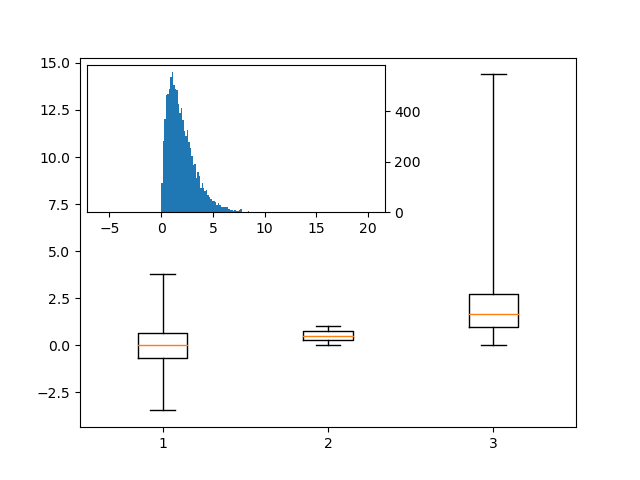

<ipython-input-17-7ac9edac1305>:7: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  plt.boxplot([df['normal'], df['random'], df['gamma']], whis = 'range')


In [17]:
# We can actually overlay axes on top of another within a figure.
# Now, this functionality isn't in the basic matplotlib space, but it's in the toolkits

import mpl_toolkits.axes_grid1.inset_locator as mpl_il

# We create a new figure and we put up our box plot
plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis = 'range')

# overlay axis on top of another
# Then we just call the inset locator and pass it the current axes object we want composition
# on top of
# We can specify this as both a width and a height in percentage from the parent axes
# We will put in position 2 (loc = 2), which will place the axes in the upper left of the
# figure
ax2 = mpl_il.inset_axes(plt.gca(), width = '60%', height = '40%', loc = 2)
ax2.hist(df['gamma'], bins = 100)
ax2.margins(x = 0.5)

In [18]:
# We'ge a little clash on the yaxis
# We just access the yaxis of the plot and call tick_right -> moves the yaxis to the right
# of the graph
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


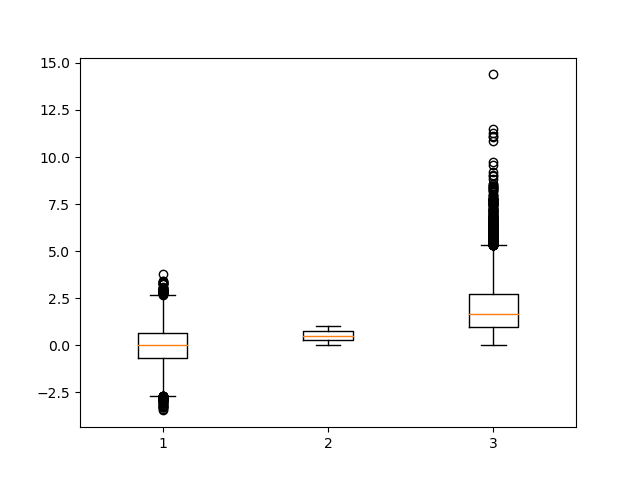

In [19]:
# If we don't supply the 'whis' argument, the whiskers actually only go out to halfway
# between the interquartile range

plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']])

In [1]:
# This is one way of detecting outliers
# The points plotted beyond the whiskers are called fliers

# Heatmaps

Heatmaps are a way to visualize three-dimensional data and to take advantage of spatial proximity of those dimensions.

Wheather data is a good example: we have two dimensions, latitude and longitude, and then we can overlay on top of this a third dimension, say, temperature or rainfall amounts, and use color to indicate its intensity.

Using a heatmap for categorial data, for instance, is just plain wrong.

<IPython.core.display.Javascript object>


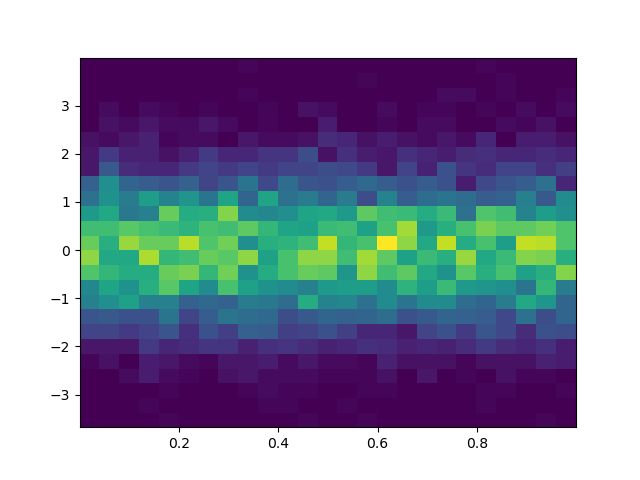

In [10]:
# In matplotlib, a heatmap is simply a two-dimensional histogram where the x and the y
# values indicate potential points and the color plotted is the frequency of the observation

plt.figure()
x = np.random.random(size = 10000)
y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
_ = plt.hist2d(x, y, bins = 25)

<IPython.core.display.Javascript object>


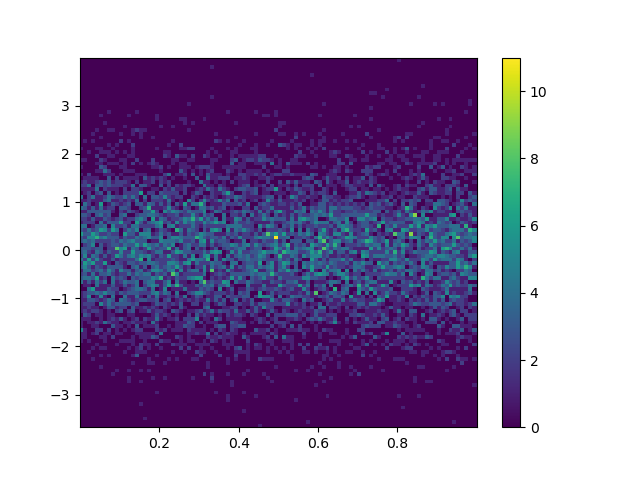

In [11]:
plt.figure()
_ = plt.hist2d(x, y, bins = 100)

In [12]:
# To add a legend for a heatmap
plt.colorbar()

# The colors show the number of ocurrences for each value

# Animation

 Animation and interactivity heavily depend on support from his backend layer. And using a backend like the image png1 doesn't provide this. However, the NBN backend or the matplotlib notebook magic function does provide for some interactivity that we can leverage here.
 
 The Matplotlib.animation module contains important helpers for building animations.
 
 For our purpose, the important object here is to call FuncAnimation. And it builds an animation by iteratively calling a function which we define. Essentially, our function will either clear the axis object and redraw the next frame, which we want users to see or will return a list of objects which need to be redrawn.

In [13]:
# Example

# First, we import the module for building animations
import matplotlib.animation as animation

# Let's define a cut-off for our animation
# We want to see how the histogram is built from one sample through 100 samples
# Let's set our cut-off value to 100
n = 100

# Then randomly pick 100 numbers and put them into a variable
x = np.random.randn(n)

In [14]:
# Now, we want to create a function which will do the plotting
# We'll call it update

# Now, the matplotlib FuncAnimation object is going to call this every few miliseconds and
# pass in the frame number we are on starting with frame zero. So we can use this as the
# index into out array values, which we called x

# curr is current
def update(curr):
    # First, we check if the current frame is at the end of our list
    if curr == n:
        # If so, we need to tell the animation to stop, what we do by calling the stop
        # object on the event source object attached to the FuncAnimation object
        # We call our animation 'a'
        a.event_source.stop()
        
    # First, we clear the current axis with cla()
    plt.cla()
    # We consider the bins, by passing in the spacing in between bins, instead of the number
    # of them that we want
    bins = np.arange(-4, 4, 0.5)
    # Then, we create a histogram using a set of value in the x up to the current value.
    # Here slicing is great
    plt.hist(x[:curr], bins = bins)
    # We also need to set the axis values since otherwise, the histogram will continually
    # autoscale between frames
    plt.axis([-4, 4, 0, 30])
    
    # Then, some formatting
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    # We can add some extra text to the graph
    plt.annotate('n = {}'.format(curr), [3, 27])

<IPython.core.display.Javascript object>


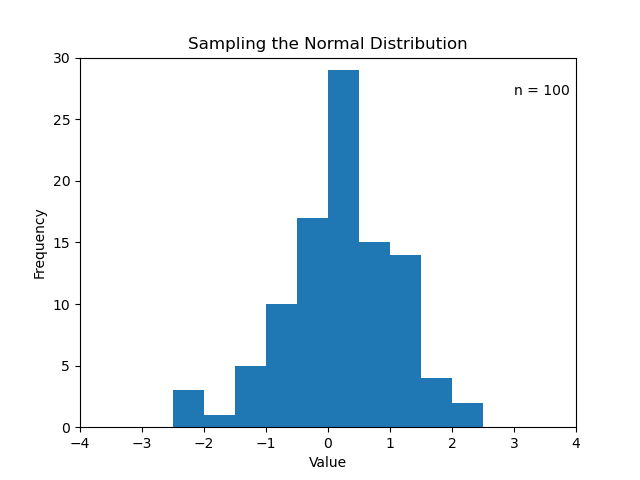

In [16]:
# Let's generate the figure now
fig = plt.figure()
# Then, we call the FuncAnimation constructor and assign this to the variable a
# 1st parameter -> figure we are working with
# 2nd paramater -> our function
# 3rd parameter -> Amount of time we want between updates (in miliseconds)
a = animation.FuncAnimation(fig, update, interval = 100)

In [17]:
# Funcanimation is a subclass of the animation object
# The animation object has a function that allows us to write the animation to a file.
# This requires additional third party library such as FFM

# Interactivity

Interactivity and animation are very similar in Matplotlib.

For interactivity though, we have to head down to the artist layer a bit more. In particular, we have to reference the canvas object of the current figure.

The canvas object handles all of the drawing events and it's tightly connected with a given back end.

We can think of an event as a piece of data which is associated with a function call. And when the event happens, the software environment, in our case this is Matplotlibs backend, will call the function with the relevant data.

<IPython.core.display.Javascript object>


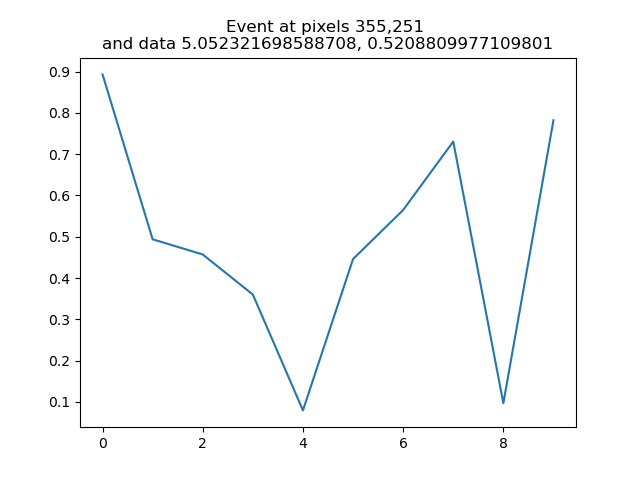

9

In [18]:
# Example

# We create a figure and plot some random data to it
plt.figure()
data = np.random.rand(10)
plt.plot(data)

# Then, we create a new function called onclick
# This takes one parameter, which is the event object. In our case, these events will be
# mouse events. And they have both an x and a y value as far as the location of the mouse
# in pixels on the canvas. As well as an x and a y values first location of the mouse
# relative to our data and axis.
def onclick(event):
    # For our onclick, we'll clear the current axis
    plt.cla()
    # Then plot our data
    plt.plot(data)
    # Then set the title of the plot to be variance location of the mouse
    plt.gca().set_title('Event at pixels {},{} \nand data {}, {}'.format(event.x, event.y,
                                                                        event.xdata, event.ydata))
    
# Finally, we need to connect these events to an event listener -> 'wiring it up'
# get the current figure and its canvas subject, thenc all the mpl_connect function.
# Passing in the string for button_press_event as well as reference to the function
# onclick, which will be called then the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [19]:
# Now, when clicking on our plot, we see the most information printed on the title

In [20]:
# Some backends are not interactive, but the most important event for us is the pick event.
# Pick event allows us to respond when the user is actually clicked on a visual element in
# the figure

In [22]:
# Example

from random import shuffle
import pandas as pd

# We create a list of countries in randomized order
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

# Then we create a dataframe with random values for height and weight
df = pd.DataFrame({'height' : np.random.rand(10),
                   'weight' : np.random.rand(10),
                   'origin' : origins})

df

,height,weight,origin
0,0.289736,0.855832,USA
1,0.810408,0.396361,Mexico
2,0.493536,0.118428,Brazil
3,0.420823,0.558787,Iraq
4,0.157229,0.313672,India
5,0.463317,0.218654,Germany
6,0.561390,0.111046,China
7,0.760318,0.185823,Chile
8,0.950589,0.510287,UK
9,0.662802,0.214722,Canada


<IPython.core.display.Javascript object>


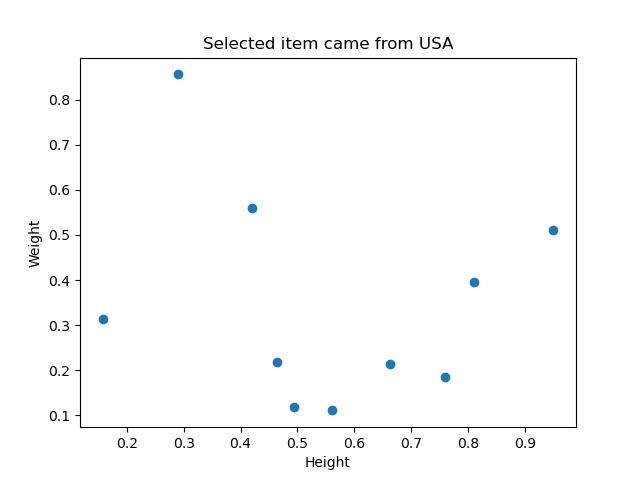

Text(0.5, 0, 'Height')

In [26]:
# Now we create a scatterplot with the x and y values as height and weight respectively
plt.figure()

# The argument 'picker' informs Matplotlib backend that the mouse doesn't have to click
# directly on a rendered object that, but that it can click up to 10 pixels away and it
# should find the closest object
plt.scatter(df['height'], df['weight'], picker = 10)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [27]:
# Let's wire it up

# Now, we create a function called onpick, which takes on an event.
# This event is a pick event which has different data than the most event. In pacticular,
# it's ot an index value which happens to correspond to our index and the dataframe.
def onpick(event):
    # Matplotlib isn't aware of the dataframe, but it renders the data in the same order.
    # So we can use the data frame iloc indexer to pull out the origin information
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))
    
# Wire up step
plt.gcf().canvas.mpl_connect('pick_event', onpick)

9